# `modgraph`

`modgraph` is a tool to explore a collection of tracker <i>mod</i>ule files as a module->sample _graph_.
It can function both as a CLI app, and as a library to use in notebooks.
In fact, this file is a [notebook](example.ipynb)!

## Using through CLI

In [10]:
!python -m modgraph --help

usage: modgraph [-h] [-f {csv,d2}] [-r RANK] files [files ...]

positional arguments:
  files                 module files to analyze

options:
  -h, --help            show this help message and exit
  -f {csv,d2}, --format {csv,d2}
                        output format
  -r RANK, --rank RANK  min number of repeats for sample to be included


### Example:

In [11]:
!python -m modgraph *.it --rank 6 --format csv

mod_path,sample_name,sample_hash
catherine on the waves.it,tambourin.steel.quiet     ,e1b32f84b2b788f0a58e277f4e152df5
catherine on the waves.it,piano.001                 ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
dallying sadly in space.it,                          ,e1b32f84b2b788f0a58e277f4e152df5
drifting to plutonia.it,tambourine.steel.quiet    ,e1b32f84b2b788f0a58e277f4e152df5
heavenly fantasy.it,tambourin.steel.quiet     ,e1b32f84b2b788f0a58e277f4e152df5
neverending illusion.it,piano.001                 ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
"so close to you, my angel.it",piano.001                 ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
sorrow.it,                          ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
sylvia.it,piano.001                 ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
tender storm.it,tambourin.steel.quiet     ,e1b32f84b2b788f0a58e277f4e152df5
why (enhanced version).it,piano.001                 ,8ef52cdf9c20c9ada9df7bf4d3b59fc3
why (enhanced version).it,tambourin.steel.quiet     ,e1b32f84b2b788

## Using as a library

In [13]:
import pandas as pd
from modgraph import modgraph
from glob import glob

# digest your library into a mod_path -> sample_hash mapping
df = pd.DataFrame(modgraph(glob("*.it")))
df = df.set_index(['mod_path', 'sample_hash']).sort_index()
df

sample_name
mod_path                  sample_hash                                                 
a day at the river.it     13dc761472f1e73cff4ed428be35a5c2  SoundWave.HiQual          
                          29797bec77f15b782ee0d8f855720213  rimshot                   
                          3e741972e4147bfc395467a293bb11a4  Flute (Skaven)            
                          46a82c17348315db0ec7d4558fb4a9e9  fx.750                    
                          6ce9cd4d2bd435dc6b410b4bc65eab2d  river.wav (Eagle)         
...                                                                                ...
why (enhanced version).it d9d2074594be1e44cebafdc840c84b94  DX-Strings 1              
                          dcacd358eb1c8a23027d1dad35e44726  osterm1bass1              
                          e1b32f84b2b788f0a58e277f4e152df5  tambourin.steel.quiet     
                          e4f1c0e5019b51ff947d0966eeac29f8  electric.guitar.solo1     
                          f8d42ab1418cdbf77a53355b600fc7fe  bassdrum.459              

[216 rows x 1 columns]

<AxesSubplot: ylabel='(sample_name, name)'>

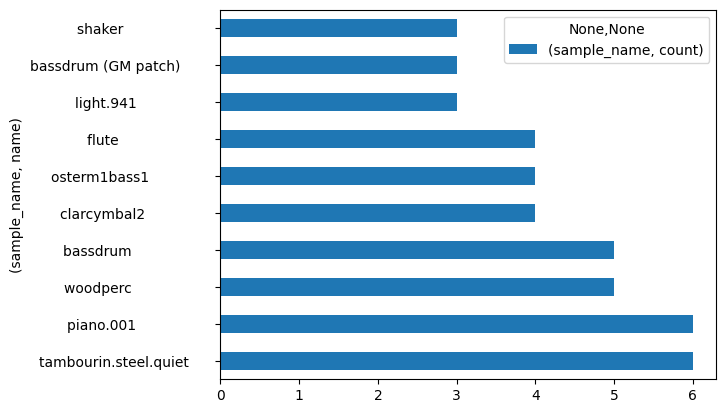

In [28]:
def most_used(df, cutoff):
    df = df.groupby("sample_hash")
    df = df.agg({"sample_name": [("name", lambda g: g.mode()[0]), "count"]})
    df = df.sort_values(("sample_name", "count"), ascending=False)
    df = df[df[("sample_name", "count")] >= cutoff]
    return df

most_used(df, cutoff=3).plot(kind="barh", x=('sample_name', 'name'))
